import tensorflow for solving neural net problem with deeplearning

In [1]:
pip install tensorflow

In [2]:
import tensorflow.keras as keras
import tensorflow as tf

print(tf.__version__)

2.4.0


load mnist data set, which is 28x28 images of 0-9 hand written digits.

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x is features data consist of 0-9 digit in 28x28 pixel images(input). y is labeled data, 0-9 digits(output).

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

visualize x in 0 index

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


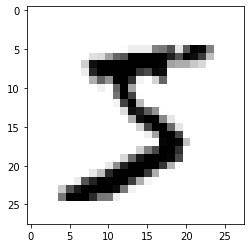

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap =plt.cm.binary)
plt.show()

showing values of y in index 0

In [7]:
print(y_train[0])

5


normalize data

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

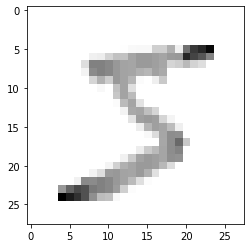

In [9]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

it looks a lil bit like 5, to make it look like 5, model it.

In [10]:
model = tf.keras.models.Sequential() #make squential model
model.add(tf.keras.layers.Flatten()) #because neural network inputs have to be flat
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))#first hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))#second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))#output 0-9 digits

optimize the model

In [11]:
model.compile(optimizer='adam', #the name of the optimizer
              loss='sparse_categorical_crossentropy', #to optimize model, minimize the loss(error)
              metrics=['accuracy'])

fit the training model!

In [12]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4655 - accuracy: 0.8704
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1156 - accuracy: 0.9637
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0728 - accuracy: 0.9766: 0s - loss: 0.0


good train result, test the model.

In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9715
0.09158524125814438
0.9714999794960022


good testing too, now save the model to epic_num_reader

In [14]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


load the saved model

In [15]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

make prediction

In [16]:
predictions = new_model.predict(x_test)

In [17]:
print(predictions)

[[5.4986521e-10 3.7553775e-08 1.3349257e-06 ... 9.9999261e-01
  7.0324475e-08 6.5240414e-08]
 [8.9880470e-10 2.0707229e-03 9.9792385e-01 ... 3.1626598e-08
  2.6269592e-07 2.1670995e-13]
 [2.0362444e-08 9.9953675e-01 3.5950630e-05 ... 3.5681119e-04
  5.6018603e-06 4.3521279e-08]
 ...
 [3.4458911e-09 2.5552291e-07 1.8335336e-07 ... 1.0427065e-05
  1.2432608e-06 2.1549202e-05]
 [6.1409655e-06 1.1692171e-08 1.1225502e-06 ... 3.4140771e-07
  2.3319126e-06 1.3098176e-09]
 [9.8373380e-07 4.6542867e-10 1.4086633e-08 ... 4.7119510e-11
  2.7814583e-08 1.4660763e-10]]


confusing, plot to see if the model works. first make the 0 index prediction then plot it

In [18]:
import numpy as np

print(np.argmax(predictions[0]))

7


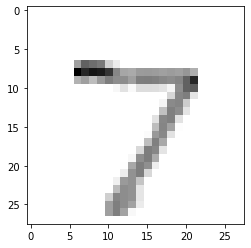

In [19]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

quite look like 7, test another index

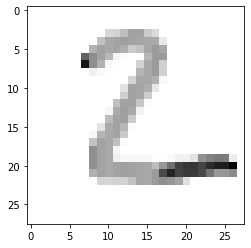

In [20]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()